### Outliers And Impact on Machine Learning!!

##### Which Machine Learining Models are SEnsitive To Outliers?
1. Naive Bayes Classifier ---------------------Not Sensitive To Outliers
2. SVM-----------------------------------------Not Sensitive 
3. Linear Regression---------------------------Sensitive
4. Logistic Regression-------------------------Sensitive
5. Decision Tree Regressor or Classifier------ Not Sensitive
6. Ensemble(RF, XGboost, GB)------------------ Not Sensitive
7. KNN-----------------------------------------Not Sensitive
8. Kmeans--------------------------------------Sensitive
9. Hierarichal---------------------------------Sensitive
10. PCA----------------------------------------Sensitive
11. Neural Networks----------------------------Sensitive
12. DBSCAN-------------------------------------Sensitive
13. Most of the unsupervised algo are sensitive

In [4]:
import pandas as pd 

In [6]:
df = pd.read_csv('titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
import seaborn as sns

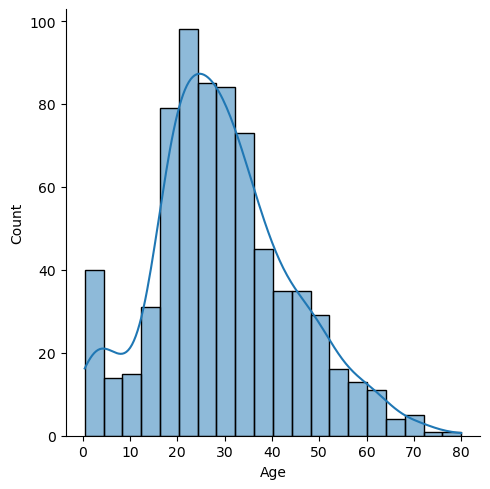

In [14]:
sns.displot(df['Age'].dropna(),kde=True)

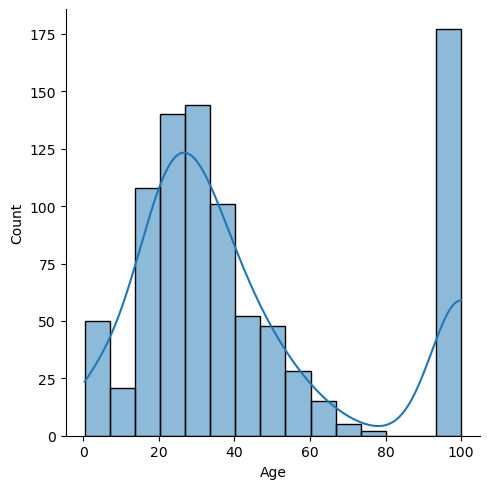

In [18]:
sns.displot(df['Age'].fillna(100),kde=True)

##### Gausian Distribution

Text(0, 0.5, 'No of passenger')

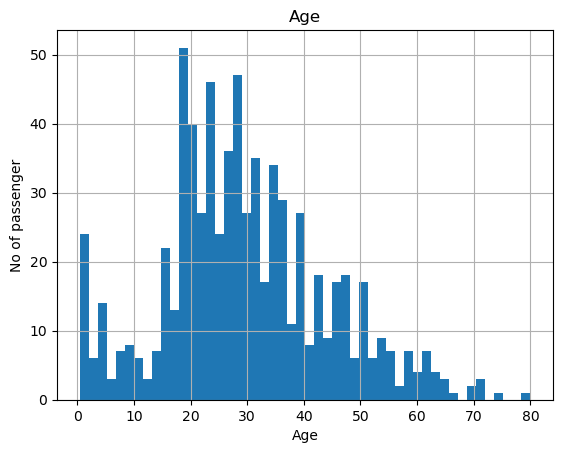

In [28]:
figure=df.Age.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No of passenger')

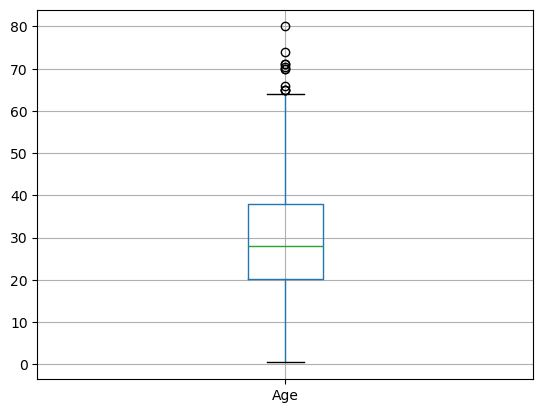

In [31]:
## when we have normal distribution, we use technique for outliers is extreme value analysis

figure = df.boxplot(column='Age')

In [33]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [35]:
### Assuming Age follows A Gaussian Distribution, wee will calculate the boundaries which differentiates the outliers
upper_boundary = df['Age'].mean()+3*df['Age'].std()
lower_boundary = df['Age'].mean()-3*df['Age'].std()

In [37]:
print(upper_boundary,lower_boundary,df['Age'].mean())

73.27860964406095 -13.88037434994331 29.69911764705882


In [39]:
### Lets compute the intrquartile range to calculate the boundaries 
IQR = df.Age.quantile(0.75)-df.Age.quantile(0.25)

In [41]:
IQR

17.875

In [43]:
lower_bridge=df['Age'].quantile(0.25) -(IQR*1.5) 
upper_bridge=df['Age'].quantile(0.75)+(IQR*1.5)
print(lower_bridge,upper_bridge)

-6.6875 64.8125


In [45]:
## EXtreme outliers

lower_bridge=df['Age'].quantile(0.25) -(IQR*3) 
upper_bridge=df['Age'].quantile(0.75)+(IQR*3)
print(lower_bridge,upper_bridge)

-33.5 91.625


##### Features is Skeqed

Text(0, 0.5, 'No. of passengers')

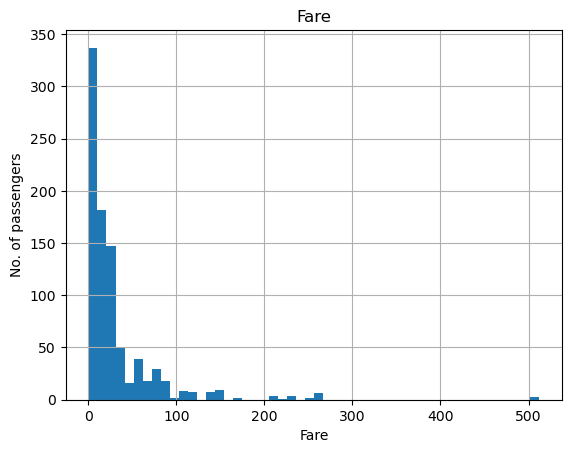

In [48]:
figure=df.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No. of passengers')

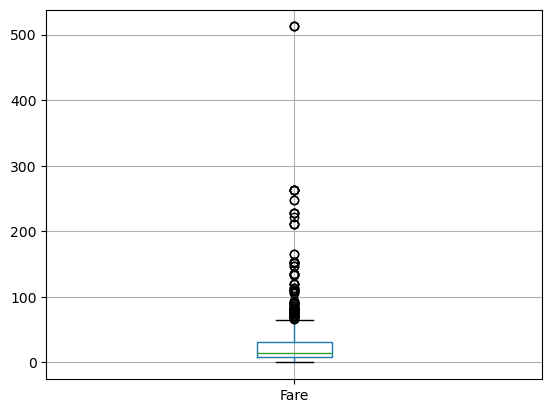

In [54]:
figure = df.boxplot(column='Fare')

In [58]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [60]:
#### Lets compute IQR 
## in gausian distribution we will find outlieres based on 3 std
## But in skewed data, we use IQR

IQR = df.Fare.quantile(0.75)-df.Fare.quantile(0.25)

In [62]:
lower_bridge=df.Fare.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Fare.quantile(0.75)+(IQR*1.5)

In [66]:
print(lower_bridge,upper_bridge)

-26.724 65.6344


In [68]:
##Extreme outliers
lower_bridge=df.Fare.quantile(0.25)-(IQR*3)
upper_bridge=df.Fare.quantile(0.75)+(IQR*3)

In [70]:
print(lower_bridge,upper_bridge)

-61.358399999999996 100.2688


In [98]:
data = df.copy()

In [100]:
data.loc[data['Age']>=73,'Age']=73

In [102]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [104]:
data.loc[data['Fare']>=100,'Fare']=100

Text(0, 0.5, 'No. of passengers')

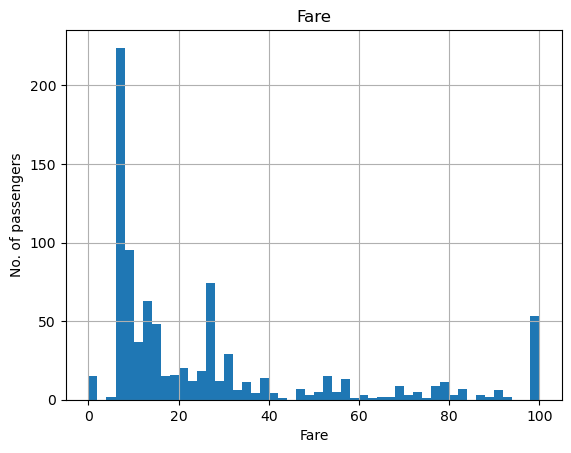

In [111]:
figure=data.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No. of passengers')

Text(0, 0.5, 'No of passenger')

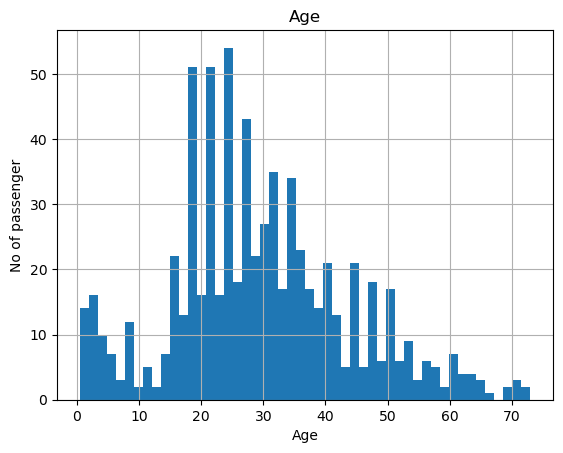

In [113]:
figure=data.Age.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No of passenger')

In [130]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data[['Age','Fare']].fillna(0),data['Survived'],test_size=0.3)

In [134]:
## logistic regression 
from sklearn.linear_model import LogisticRegression 
classifier = LogisticRegression()
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test) 
y_pred1=classifier.predict_proba(x_test)

from sklearn.metrics import accuracy_score,roc_auc_score 
print(f"Accuracy_score: {accuracy_score(y_test,y_pred)}")
print(f'roc_auc_score : {roc_auc_score(y_test,y_pred1[:,1])}')

Accuracy_score: 0.6492537313432836
roc_auc_score : 0.6962313003452243


In [136]:
## Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test) 
y_pred1=classifier.predict_proba(x_test)

from sklearn.metrics import accuracy_score,roc_auc_score 
print(f"Accuracy_score: {accuracy_score(y_test,y_pred)}")
print(f'roc_auc_score : {roc_auc_score(y_test,y_pred1[:,1])}')

Accuracy_score: 0.6828358208955224
roc_auc_score : 0.7059551208285386
